<b><div style="text-align:right">Алексей Бебчик&nbsp;&nbsp;</div><b>
### Курс 6. Неделя 1. Задание, оцениваемое сокурсниками


Скачайте сырые данные о поездках жёлтого такси с сайта TLC: www.nyc.gov/html/tlc/html/about/trip_record_data.shtml 

Поездки зелёного такси и лимузинов нас не интересуют!

Данные выложены в файлах по месяцам. Скачайте так много данных жёлтого такси, как сможете; чем больше вы будете использовать данных, тем точнее получатся ваши прогнозы. Если вы решите использовать не все данные, а только часть, выбирайте её по времени с конца. Абсолютный минимум необходимых данных — 6 месяцев: один, последний месяц, вам понадобится для тестирования, предшествующие 5 — для обучения. По 5 месяцам можно построить прогнозы, учитывающие дневную и недельную сезонности, но в данных есть и годовая. Чтобы её учесть, необходимы данные как минимум за 2 года.   

Обработайте сырые данные по следующей схеме.  
1. Почистите данные от ошибок и аномалий.  
2. Отбросьте минуты и секунды во времени начала поездки.  
3. Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты. Разбейте этот прямоугольник на 2500 одинаковых прямоугольных областей — по 50 интервалов вдоль каждой оси.  
4. Посчитайте количество поездок за каждый час из каждой области. Не забудьте, что если в сырых данных для какой-то пары час-область нет ни одной записи, то в агрегированных данных для неё должен стоять 0.  

В дальнейшем, когда вы будете предсказывать получившиеся ряды, нужно будет загружать ваши прогнозы на kaggle, поэтому нужно, чтобы идентификаторы ячеек были определены однозначно. В следующем файле даны идентификаторы ячеек, которые вам нужно использовать, и географические координаты их границ: 

regions.csv

Для сдачи задания этой недели вам нужно агрегировать только данные за май 2016, но, когда задание будет сдано, не забудьте запустить ваш агрегирующий скрипт на всех остальных месяцах, которые вы собираетесь использовать при прогнозировании. 


Чтобы сдать задание, выполните следующую последовательность действий.

1 . Загрузите данные за май 2016 года.  

2 . Проведите фильтрацию:   
удалите поездки с  
•нулевой длительностью  
•нулевым количеством пассажиров  
•нулевым расстоянием поездки по счётчику  
•координатами начала, не попадающими в прямоугольник Нью-Йорка  

Можно придумать ещё какие-то критерии для фильтрации данных; тем не менее, не стоит применять дополнительные фильтры: начиная с четвёртой недели вам предстоит сравнивать качество ваших прогнозов с качеством прогнозов других слушателей, и, чтобы это сравнение было корректным, нужно, чтобы данные у всех были предобработаны одинаково.   

3 . Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.  

4 . Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.  

5 . Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.  

6 . Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.  

7 . Загрузите ноутбук в форму ниже  


__Review criteria__

В качестве ответа в этом задании вам нужно загрузить ноутбук; убедитесь, что ход анализа, который вы провели, описан достаточно подробно для того, чтобы ваши сокурсники поняли, что вы делали и почему. 


In [5]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
import itertools

Populating the interactive namespace from numpy and matplotlib


__1. Загрузите данные за май 2016 года__

In [12]:
data_path = '..\\YTData\\' #путь к папке с данными

In [13]:
file_may = data_path  + 'yellow_tripdata_2016-05.csv'
#df5 = pd.read_csv(file_may, sep=',', parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'], nrows=1000000) 
df5 = pd.read_csv(file_may, sep=',', parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime']) 

In [17]:
df5.shape #(11836853, 19)

(11836853, 19)

In [18]:
df5.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


__2.Проведите фильтрацнию__

Удаляем признаки с:

1) поездки с нулевой длительностью

In [19]:
del_index = df5[(df5.tpep_pickup_datetime == df5.tpep_dropoff_datetime) | #Нулевая длительность
                (df5['passenger_count'] == 0)         | # поездки с нулевым количеством пассажиров
                (df5['trip_distance'] == 0)           | # поездки с нулевым расстоянием поездки по счётчику
                (df5['pickup_longitude'] < -74.25559) | # поездки, не попадающие в прямоугольник Нью-Йорка
                (df5['pickup_longitude'] > -73.70001) |
                (df5['pickup_latitude']  <  40.49612) | 
                (df5['pickup_latitude']  >  40.91553)].index

In [20]:
df5.drop(del_index, inplace=True)

#### Отбросьте минуты и секунды во времени начала поездки.

In [21]:
df5['tpep_pickup_dayhour'] = df5.tpep_pickup_datetime.dt.floor('H') #день и час (.dt.hour - только час)

In [22]:
df5.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tpep_pickup_dayhour
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,2016-05-01
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,2016-05-01
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,2016-05-01
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,2016-05-01
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,2016-05-01


__3 . Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.__

Разбейте этот прямоугольник на 2500 одинаковых прямоугольных областей — по 50 интервалов вдоль каждой оси.

In [28]:
dfreg = pd.read_csv('..\\YTData\\regions.csv', sep=';') #загружаем регионы

In [29]:
#Соберем значения оси х (из двух столбцов, т.к. взяв столбец west, мы потеряем значение east в последнем элементе)
binx = sorted(set(dfreg.west.value_counts().index) | set(dfreg.east.value_counts().index))

#Соберем значения оси y (из двух столбцов, т.к. взяв столбец south, мы потеряем значение north в последнем элементе)
biny = sorted(set(dfreg.south.value_counts().index) | set(dfreg.north.value_counts().index))

In [30]:
print 'Интервалы: ', 'по x -', len(binx)-1, ', по y -', len(biny)-1, ', всего ячеек -', (len(binx)-1)*(len(biny)-1)

Интервалы:  по x - 50 , по y - 50 , всего ячеек - 2500


In [31]:
#При считывании из файла у значений границ получаются очень длинные хвосты, округлим до 7 знаков, как в файле
binx = map(lambda x: round(float(x), 7), binx)
biny = map(lambda x: round(float(x), 7), biny)

In [32]:
#Для примера получим количество элементлов в каждом квадрате
r = binned_statistic_2d(
    x         = df5.pickup_longitude,
    y         = df5.pickup_latitude, 
    values    = None, 
    statistic ='count', 
    bins      = [binx, biny],
    range     = [[-74.25559, -73.70001], [40.49612, 40.91553]],
    expand_binnumbers = True
    )

C:\Users\AUser\Anaconda2\lib\site-packages\scipy\stats\_binned_statistic.py:599: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


In [33]:
print df5.shape[0], r.statistic.sum() #количество поездок совпадает, разбиение произошло целиком

11626521 11626521.0


In [34]:
#Т.к. binned_statistic_2d добавляет виртуальные корзины слева и справа от указанных границ, 
#полезно написать фукнцию, которая покажет реальный номер корзины для переданного элемента данных по его номеру
def elm_binnum(elm_num, binnums, bins=50):
    elm_binx = binnums[0][elm_num]-1
    elm_biny = binnums[1][elm_num]-1
    bin_num = elm_binx*(bins)+elm_biny+1
    return bin_num    

In [35]:
#Воспользуемся этой функцией, чтобы проставит регион в данных
#data_nums = [elm_binnum(i, r.binnumber)-1 for i in range(len(df5))]
#dfreg.iloc[data_nums]
data_regs = [elm_binnum(i, r.binnumber) for i in range(len(df5))]
df5['region'] = data_regs

__ Агрегация по часам и регионам __

Посчитайте количество поездок за каждый час из каждой области. Не забудьте, что если в сырых данных для какой-то пары час-область нет ни одной записи, то в агрегированных данных для неё должен стоять 0.

In [36]:
#Сформируем список "день-час"
dfDH = df5.groupby(['tpep_pickup_dayhour'], as_index=False).total_amount.count()
dfDH.columns = ['dayhour', 'dayhour_cnt']
#dfDH.head()

In [37]:
#Считаем количество поездок для каждого дня-часа и области
dfDHR = df5.groupby(['tpep_pickup_dayhour', 'region'], as_index=False).total_amount.count()
dfDHR.columns = ['dayhour', 'region', 'cnt']
#dfDHR.head(1000)

In [38]:
#сформируем все возможные комбинации пар час-область
dhr_all = []
for x in itertools.product(dfDH.dayhour, list(dfreg.region)): dhr_all.append(x)

In [39]:
#Создаем DataFrame для всех пар
dfDHRall = pd.DataFrame(data=dhr_all, columns=['dayhour','region'], dtype=int)

In [40]:
#Приведем к одному типу (мы собирали данные по-разному и у них оказался разный тип, из-за этого далее не работла left join)
dfDHR.dayhour    = dfDHR.dayhour.astype('datetime64[ns]')
dfDHRall.dayhour = dfDHRall.dayhour.astype('datetime64[ns]')

In [41]:
#Добавим столбец с количеством поездок для каждой пары с помощью left join, заполнив NaN нулями
dfDHRall['cnt'] = pd.merge(dfDHRall, dfDHR, how='left', on = ['dayhour', 'region']).fillna(0).cnt.astype(int)

In [42]:
# print 'Контроль:', dfDH.shape[0], '=' , 31*24, ';', dfDHRall.shape[0], '=' , 31*24*2500, '; trips =', dfDHR.shape[0]

In [43]:
print df5.shape[0], dfDHRall.cnt.sum() #количество поездок совпадает, поездки распределены по дням и часам полностью

11626521 11626521


__4 . Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.__

In [44]:
dfDHRall.head() #при выводе не виден час, но он есть

,dayhour,region,cnt
0,2016-05-01,1,0
1,2016-05-01,2,0
2,2016-05-01,3,0
3,2016-05-01,4,0
4,2016-05-01,5,0


In [45]:
#dfDHRall.dayhour #это видно здесь, если убрать комментарий

__5 . Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.__

In [46]:
#Координаты Empire State Building (взяты из интернета)
emp_x = -73.985428
emp_y = 40.748817

In [47]:
#Функция определения индекс корзины (строка-столбец) коорденатам по элемента и разбивке осей x и y
def edge2d_num(elm_x, elm_y, egdes_x, egdes_y):
    for i, x in enumerate(sorted(egdes_x)):
        if elm_x <= x: 
            for j, y in enumerate(sorted(egdes_y)):
                if elm_y <= y: 
                    return (i-1, j-1)

In [48]:
emp_bin = edge2d_num(emp_x, emp_y, r.x_edge, r.y_edge)
emp_bin #двумерный индекс корзины (области)

(24, 30)

In [49]:
#По двумерному индексу определим номер региона, с учетом того, что у нас всего 50 строк/стобцов
n_regs = len(r.x_edge)-1 #50
emp_reg = emp_bin[0]*(n_regs)+emp_bin[1]+1
print 'Номер региона Empire State Building:', emp_reg

Номер региона Empire State Building: 1231


In [50]:
df_emp = dfreg[dfreg.region==emp_reg]
df_emp

,region,west,east,south,north
1230,1231,-73.988912,-73.9778,40.747766,40.756154


In [51]:
#Для удобства проверки считаем границы области и проверим, входи ли здание в эту область
emp_reg_west  = np.array(df_emp)[0][1]
emp_reg_east  = np.array(df_emp)[0][2]
emp_reg_south = np.array(df_emp)[0][3]
emp_reg_north = np.array(df_emp)[0][4]

if ((emp_reg_west <= emp_x) & (emp_x < emp_reg_east) & (emp_reg_south <= emp_y) & (emp_y < emp_reg_north) ): 
    print 'Координаты Empire State Building входят в найденную область'

Координаты Empire State Building входят в найденную область


__Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.__

In [52]:
#Сгруппируем данные по дням-часам поездок для области Empire State Building
dfEmpMay = dfDHRall[dfDHRall.region==emp_reg].groupby(['dayhour'], as_index=False).cnt.sum()
dfEmpMay.columns = ['dayhour','cnt']

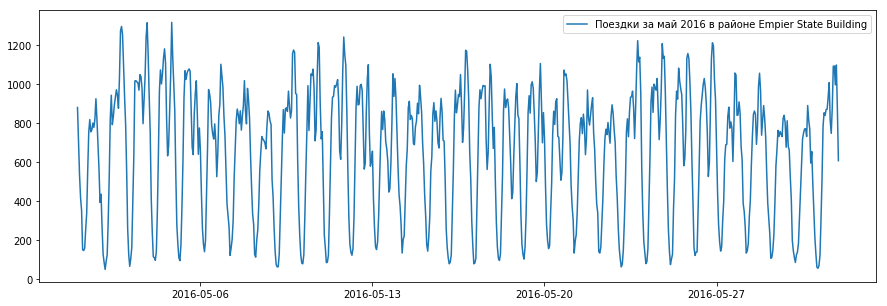

In [53]:
plt.figure(figsize=(15,5))
plt.plot(list(dfEmpMay.dayhour), list(dfEmpMay.cnt), label=u'Поездки за май 2016 в районе Empier State Building')
plt.legend()
plt.show()

__6 . Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.__

In [54]:
print 'Число пар чай-ячейка без поездок:', dfDHRall[dfDHRall.cnt==0].cnt.count()

Число пар чай-ячейка без поездок: 1718238
